In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv


In [3]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import csv

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1. Reading the dataset

In [4]:
df=pd.read_csv("/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv",encoding="unicode_escape")
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [5]:
#check the shape of the given dataset
print(f'The dataset has {df.shape[0]} number of rows and {df.shape[1]} number of columns.')

The dataset has 205052 number of rows and 6 number of columns.


In [6]:
#check the columns in dataset
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

2. Exploratory Data Analysis

In [7]:
#Check number of uniqueIds to see if there's any duplicate record in our dataset
df['product_name'].nunique()

958

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


3. Data Pre-Processing

In [9]:
# check the null values
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [10]:

# drop the null values
df.dropna(inplace=True, axis=0)

4. Pre-Processing Reviews

In [11]:
#check first three reviews
for review in df['Review'][0:3]:
    print(review,'\n')

super! 

awesome 

fair 



Exploratory Data Analysis

In [19]:

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
     # Define the pattern for special characters
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["Review"] = df["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Remove HTML tags
Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64...", we will use get_text() to remove the html tags if there are any.
* Remove Stop Words
Remove the stopwords like "a", "the", "I" etc.
Remove symbols and special characters.
We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
* Tokenize
We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
* Stemming -Remove the suffixes from the words to get the root form of the word. e.g 'Wording' --> "Word"

In [18]:
ratings = df["Rate"].value_counts()
df = df[(df.Rate !='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)') & (df.Rate != "Bajaj DX 2 L/W Dry Iron") & (df.Rate !='Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')]

(array([34969., 21052., 31436., 15831., 31851., 13252.,  8501.,  9176.,
         6668.,  7643.]),
 array([  0. ,  47.8,  95.6, 143.4, 191.2, 239. , 286.8, 334.6, 382.4,
        430.2, 478. ]),
 <BarContainer object of 10 artists>)

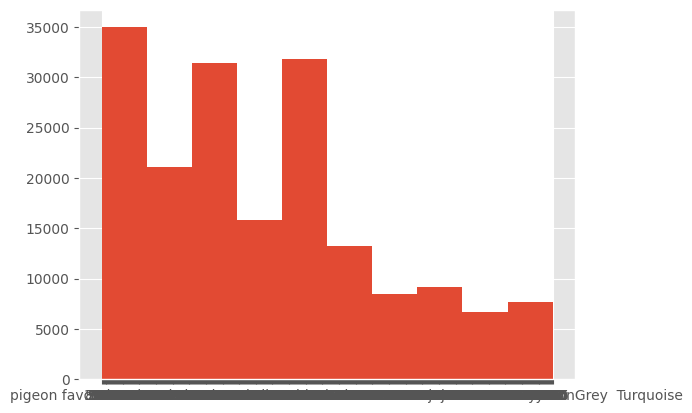

In [23]:
# Plot of product price
plt.hist(df['product_price'])

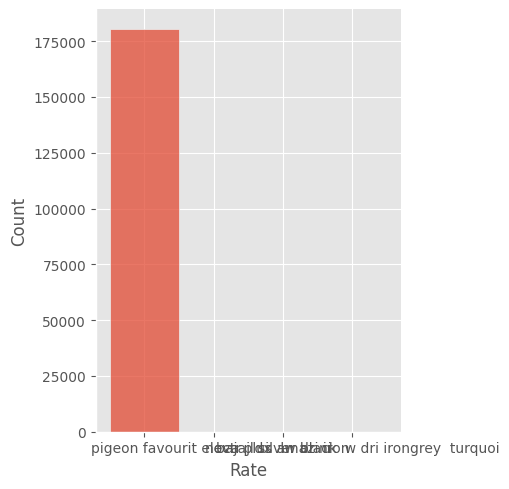

In [24]:
sns.displot(data=df, x="Rate")

In [ ]:
#Pigeon has highest rating count.

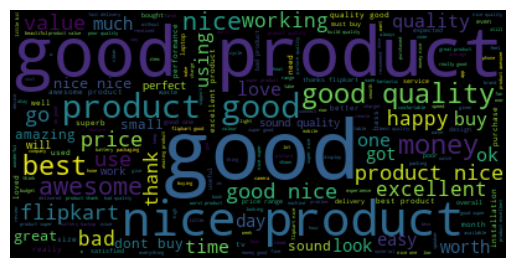

In [27]:
#creating a word cloud for summary

from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = " ".join(i for i in df.Summary)

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Summary indicates good quality, excellent, nice, working etc

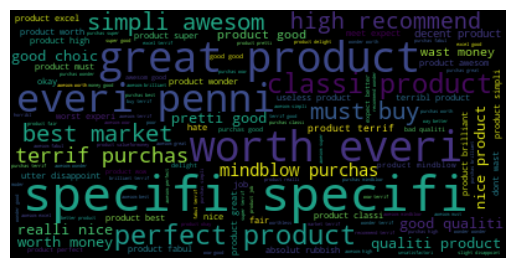

In [28]:
#creating a word cloud for review

from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = " ".join(i for i in df.Review)

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word cloud indicates that people are satisfied with Flipkart products and services.

In [11]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Download the stop words corpus
nltk.download('stopwords')

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#apply review_to_words function on reviews
df['Review'] = df['Review'].apply(review_to_words)

/tmp/ipykernel_34/2586090758.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [13]:
from sklearn.preprocessing import LabelEncoder

# apply label encoding to the sentiment column
encoder = LabelEncoder()
df['sentiment_encoded'] = encoder.fit_transform(df['Sentiment'])

6. Model Building

In [14]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

We all know that we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.

In [15]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(df.Review)
reviews_corpus.shape

(180379, 1018)

We have built reviews_corpus which are the independent feature in our model.

In [16]:
#dependent feature
sentiment = df['sentiment_encoded']
sentiment.shape

(180379,)

In [17]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (120853, 1018) (120853,)
Test data shape  (59526, 1018) (59526,)


Apply Multinomial Naive Bayes

* Multinomial Naive Bayes is useful for determining the emotional tone of a piece of text, such as a tweet, product review, or customer feedbacks. The model works by computing the probability of each possible sentiment label (positive, negative, neutral) given a piece of text.

In [18]:
clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.9029163726774855
Confusion Matrix
[[ 5804   511   493]
 [   18     7    93]
 [ 2273  2391 47936]]


We got an accuracy of 90.2% by using NaiveBayes.

In [19]:
#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.9096529247723684
Confusion Matrix
[[ 6118   524   491]
 [    0     0     1]
 [ 1977  2385 48030]]


Once we transformed our reviews into vectors using TfidfVectorizer and used both NaiveBayes and RandomForestClassifier, we observed that RandomForestClassifier outperformed MultinomialNB. 
By using RandomForestClassifier without any parameter tuning, we attained an accuracy of 90.95%. However, we can still further improve our accuracy by tuning the parameters of our classifier.

RandomForestClassifier proved better for sentiment analysis as the model contains labeled dataset of texts with corresponding sentiment labels (positive, negative, neutral). 